In [175]:
import cv2
import numpy as np
import time
from matplotlib.pyplot import imshow,title, plot, subplot, grid, subplots_adjust,yscale, xscale
%matplotlib inline

Image Dimensions: [2735,4102]


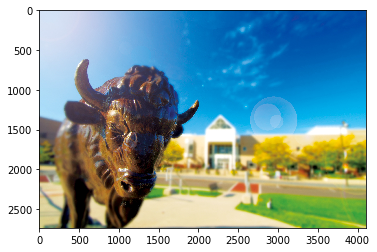

In [176]:
image = cv2.cvtColor(cv2.imread('ub_logo.jpg'), cv2.COLOR_BGR2RGB)
gray = cv2.imread('ub_logo.jpg',0)

gp = cv2.imread('ub_logo.jpg',0)

N = image.shape[0]
M = image.shape[1]

print('Image Dimensions: [{},{}]'.format(N,M))
imshow(image);

<h3>1 Image Histogram</h3>
<p>
    <ol>
        <li> Scan every pixel of the image ($I$)</li>
        <li> Increment the relevent index in $H$ if pixel $p$ has intensity $g_p$</li>
            
    </ol>
         
$$ H[g_p] = H[g_p] + 1 $$
</p>

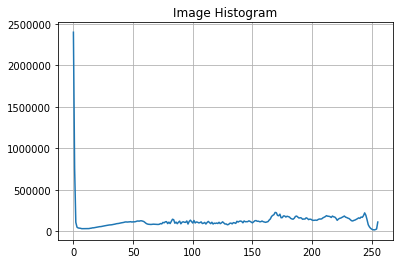

In [179]:
H = np.zeros(256);

for p in range(0, N):
    for q in range(0, M):
        H[image[p][q]] += 1  
        
plot(H);
title('Image Histogram');
grid(True);

<h3>2 Cumulative Histogram</h3>
<p>
    <ol>
        <li> Let $C[0] = H[0] $</li>
        <li> Sum the intensities across the histogram</li>
            
    </ol>
         
$$C[p] = C[p-1] + H[p] , p = 1,2,3 .. 255 $$
</p>

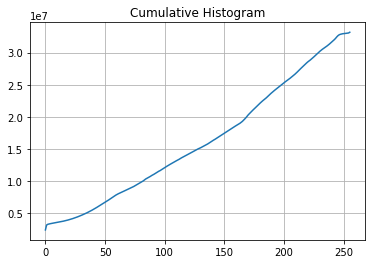

In [180]:
C = np.zeros(256)
C[0] = H[0]
for p in range(1, 256):
    C[p] = C[p-1] + H[p]

#print('Max = {}, Min= {}'.format(max(C),min(C)))
plot(C);
title('Cumulative Histogram');
grid(True);

<h3>3 Look up table</h3>
<p>
 
$$T[p] = round\Big( \frac{256-1}{NM} * C[p]\Big)$$
</p>

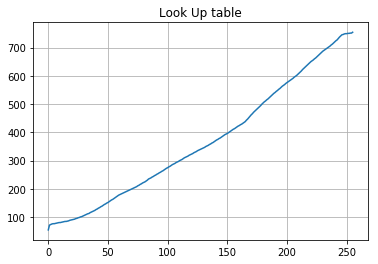

In [181]:
T = np.zeros(256)
value = (256.0 - 1)/(N * M)
for p in range(0, 256):
    T[p] = round(value * C[p])

plot(T);
title('Look Up table');
grid(True);

<h3>4 Regenerating Image</h3>
<p>
    $$image_p = T[image_p]$$
</p>

In [182]:
for p in range(0, N):
    for q in range(0, M):
        gp[p][q] = T[gp[p][q]]

<h3>5 Equalization Step</h3>

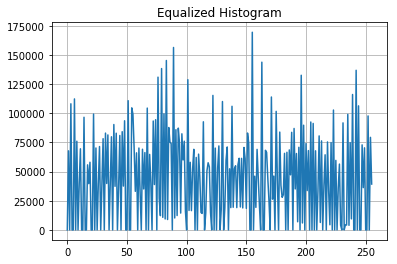

In [183]:
E = np.zeros(256)
for p in range(0, N):
    for q in range(0, M):
        E[gp[p][q]] += 1
        
plot(E);
title('Equalized Histogram');
grid(True);

<h3>Results</h3>

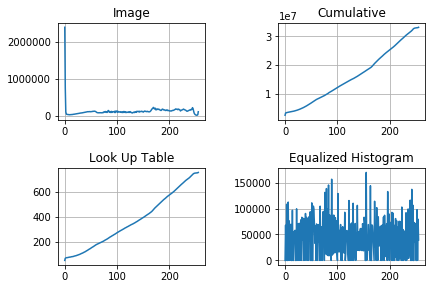

In [184]:
subplot(221); plot(H);title('Image');grid(True)
subplot(222); plot(C);title('Cumulative');grid(True)
subplot(223); plot(T);title('Look Up Table');grid(True)
subplot(224); plot(E);title('Equalized Histogram');grid(True)
subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,wspace=0.5)

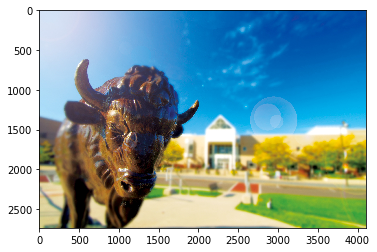

In [185]:
imshow(image);

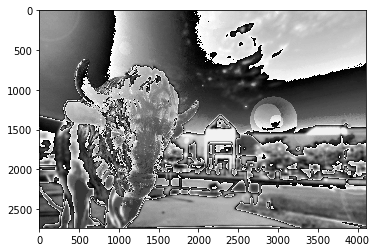

In [186]:
imshow(gp,cmap='gray');

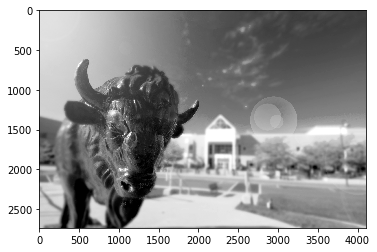

In [187]:
imshow(gray, cmap='gray');